# Shelter Animal Outcomes

https://www.kaggle.com/c/shelter-animal-outcomes

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
animals = pd.read_csv('data/shelter-train.csv')

In [3]:
animals.head(2)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby


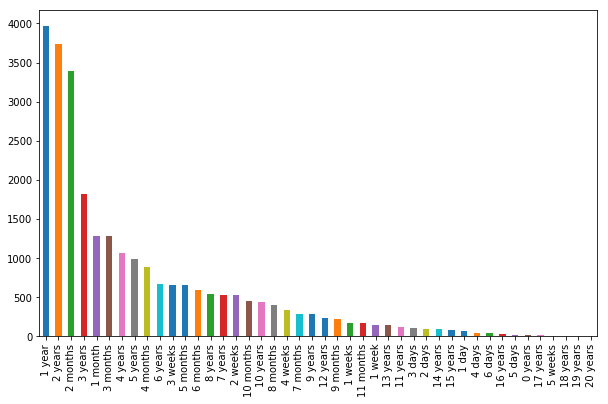

In [4]:
animals.AgeuponOutcome.value_counts().plot(kind='bar', figsize=(10, 6))

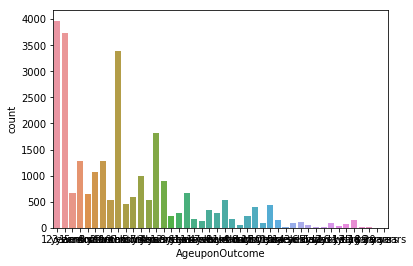

In [5]:
sns.countplot(data=animals, x=animals.AgeuponOutcome)

[Text(0,0,'1 year'),
 Text(0,0,'2 years'),
 Text(0,0,'3 weeks'),
 Text(0,0,'1 month'),
 Text(0,0,'5 months'),
 Text(0,0,'4 years'),
 Text(0,0,'3 months'),
 Text(0,0,'2 weeks'),
 Text(0,0,'2 months'),
 Text(0,0,'10 months'),
 Text(0,0,'6 months'),
 Text(0,0,'5 years'),
 Text(0,0,'7 years'),
 Text(0,0,'3 years'),
 Text(0,0,'4 months'),
 Text(0,0,'12 years'),
 Text(0,0,'9 years'),
 Text(0,0,'6 years'),
 Text(0,0,'1 weeks'),
 Text(0,0,'11 years'),
 Text(0,0,'4 weeks'),
 Text(0,0,'7 months'),
 Text(0,0,'8 years'),
 Text(0,0,'11 months'),
 Text(0,0,'4 days'),
 Text(0,0,'9 months'),
 Text(0,0,'8 months'),
 Text(0,0,'15 years'),
 Text(0,0,'10 years'),
 Text(0,0,'1 week'),
 Text(0,0,'0 years'),
 Text(0,0,'14 years'),
 Text(0,0,'3 days'),
 Text(0,0,'6 days'),
 Text(0,0,'5 days'),
 Text(0,0,'5 weeks'),
 Text(0,0,'2 days'),
 Text(0,0,'16 years'),
 Text(0,0,'1 day'),
 Text(0,0,'13 years'),
 Text(0,0,'17 years'),
 Text(0,0,'18 years'),
 Text(0,0,'19 years'),
 Text(0,0,'20 years')]

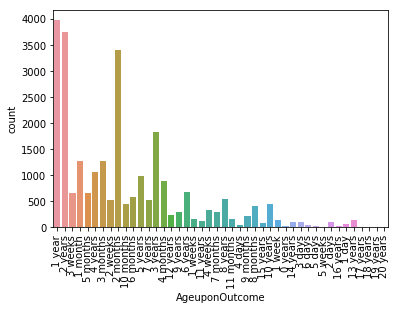

In [6]:
g = sns.countplot(data=animals, x=animals.AgeuponOutcome)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0,0,'1 year'),
 Text(0,0,'2 years'),
 Text(0,0,'3 weeks'),
 Text(0,0,'1 month'),
 Text(0,0,'5 months'),
 Text(0,0,'4 years'),
 Text(0,0,'3 months'),
 Text(0,0,'2 weeks'),
 Text(0,0,'2 months'),
 Text(0,0,'10 months'),
 Text(0,0,'6 months'),
 Text(0,0,'5 years'),
 Text(0,0,'7 years'),
 Text(0,0,'3 years'),
 Text(0,0,'4 months'),
 Text(0,0,'12 years'),
 Text(0,0,'9 years'),
 Text(0,0,'6 years'),
 Text(0,0,'1 weeks'),
 Text(0,0,'11 years'),
 Text(0,0,'4 weeks'),
 Text(0,0,'7 months'),
 Text(0,0,'8 years'),
 Text(0,0,'11 months'),
 Text(0,0,'4 days'),
 Text(0,0,'9 months'),
 Text(0,0,'8 months'),
 Text(0,0,'15 years'),
 Text(0,0,'10 years'),
 Text(0,0,'1 week'),
 Text(0,0,'0 years'),
 Text(0,0,'14 years'),
 Text(0,0,'3 days'),
 Text(0,0,'6 days'),
 Text(0,0,'5 days'),
 Text(0,0,'5 weeks'),
 Text(0,0,'2 days'),
 Text(0,0,'16 years'),
 Text(0,0,'1 day'),
 Text(0,0,'13 years'),
 Text(0,0,'17 years'),
 Text(0,0,'18 years'),
 Text(0,0,'19 years'),
 Text(0,0,'20 years')]

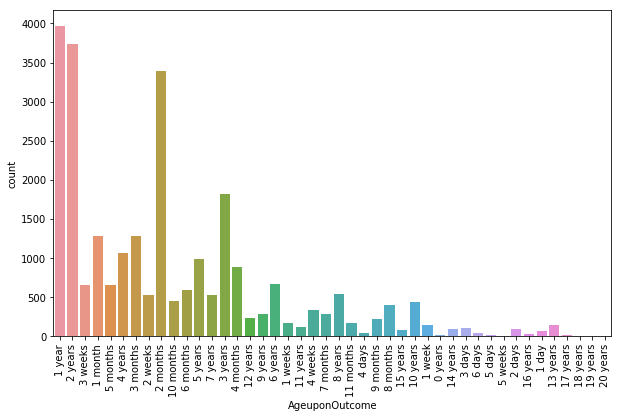

In [7]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.countplot(data=animals, x=animals.AgeuponOutcome, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [8]:
def get_age_in_days(age_upon_outcome):
    if str(age_upon_outcome) == 'nan':
        return 0
    time_value, unit = age_upon_outcome.split(' ')
    if unit == 'year' or unit == 'years':
        return int(time_value) * 365
    if unit in ['month', 'months']:
        return int(time_value) * 30
    if unit in ['week', 'weeks']:
        return int(time_value) * 7
    if unit in ['day', 'days']:
        return int(time_value)

In [9]:
animals['AgeInDays'] = animals.AgeuponOutcome.map(get_age_in_days)

In [10]:
animals.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730


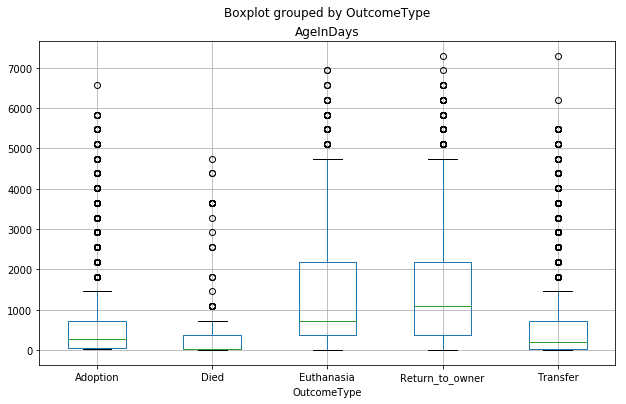

In [11]:
animals.boxplot(column=['AgeInDays'], by='OutcomeType', figsize=(10, 6))

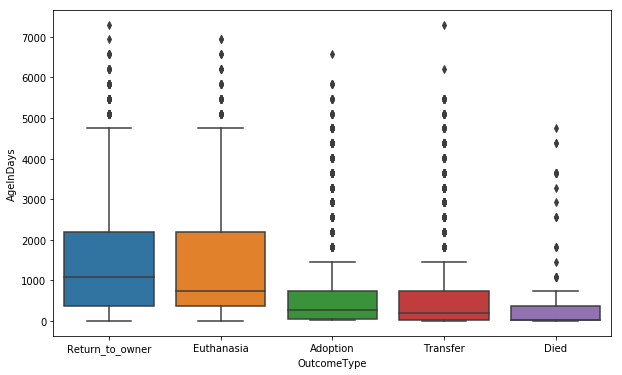

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(data=animals, x='OutcomeType', y='AgeInDays', ax=ax)

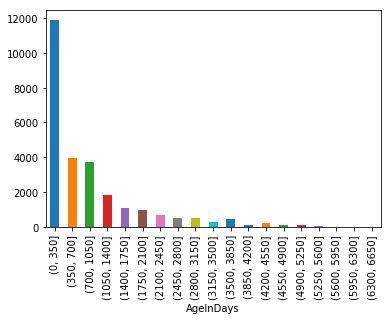

In [13]:
pd.cut(animals.AgeInDays, list(range(0, 7000, 100))).head(5)
animals.groupby(pd.cut(animals.AgeInDays, list(range(0, 7000, 350)))).mean()
avg_data_by_age = animals.groupby(pd.cut(animals.AgeInDays, list(range(0, 7000, 350)))).count()
avg_data_by_age.AgeInDays.plot(kind='bar')

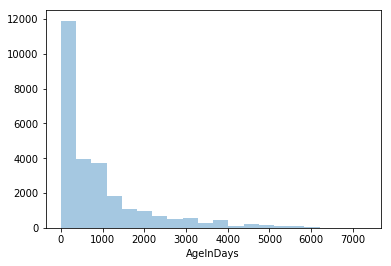

In [14]:
sns.distplot(animals.AgeInDays, bins=20, kde=False)

ดู distribution ของสัตว์แต่ละชนิด

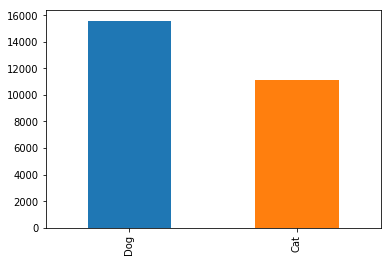

In [15]:
animals.AnimalType.value_counts().plot(kind='bar')

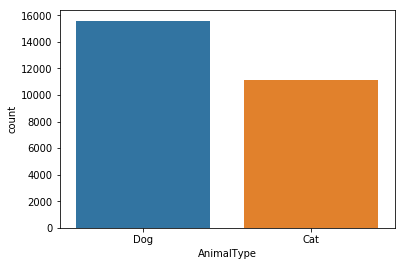

In [16]:
sns.countplot(data=animals, x=animals.AnimalType)

ดู distribution ของ outcome type

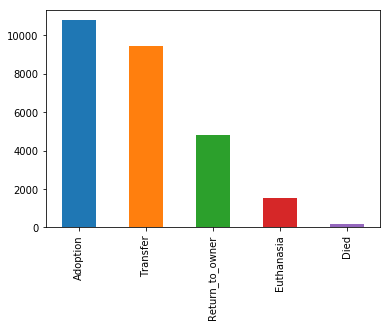

In [17]:
animals['OutcomeType'].value_counts().plot(kind='bar')

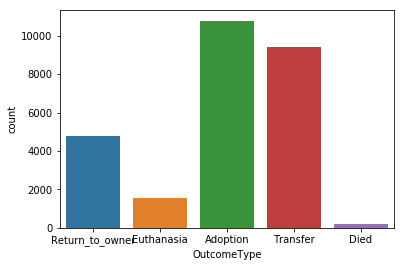

In [18]:
sns.countplot(data=animals, x=animals.OutcomeType)

เทียบ distribution ของสัตว์แต่ละชนิดโดยแยกตาม outcome type

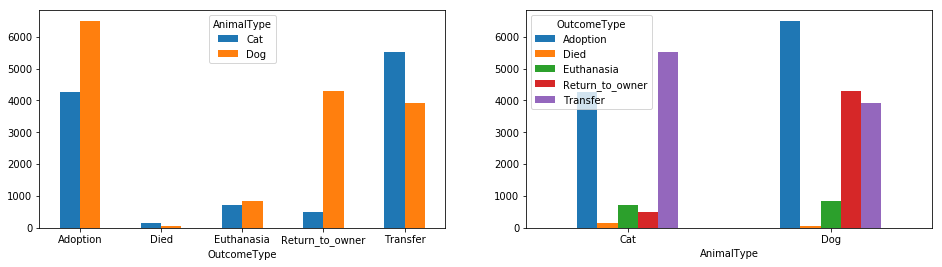

In [19]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
animals[['AnimalType', 'OutcomeType']].groupby(['OutcomeType', 'AnimalType']).size().unstack().plot(kind='bar', ax=ax1, rot=0)
animals[['AnimalType', 'OutcomeType']].groupby(['AnimalType', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax2, rot=0)

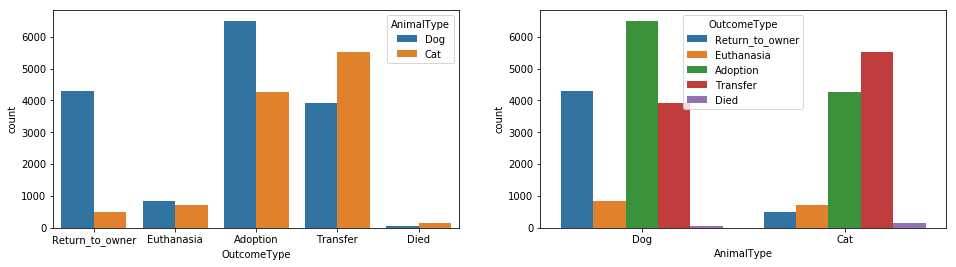

In [20]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType', hue='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType',hue='OutcomeType', ax=ax2)

ดู distribution ของเพศ

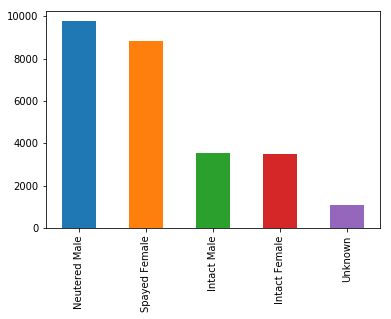

In [21]:
animals['SexuponOutcome'].value_counts().plot(kind='bar')

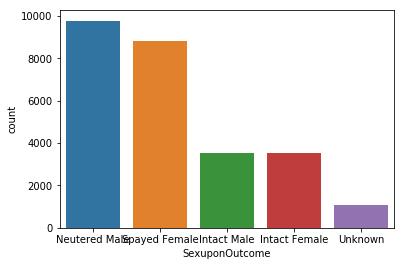

In [22]:
sns.countplot(data=animals, x=animals.SexuponOutcome)

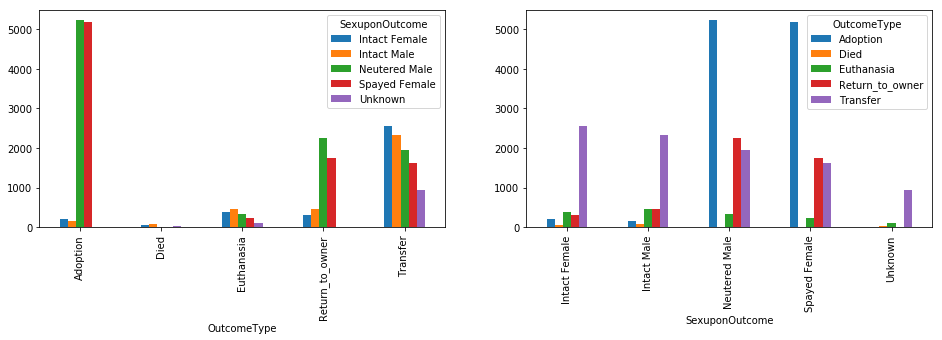

In [23]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
animals[['SexuponOutcome', 'OutcomeType']].groupby(['OutcomeType', 'SexuponOutcome']).size().unstack().plot(kind='bar', ax=ax1)
animals[['SexuponOutcome', 'OutcomeType']].groupby(['SexuponOutcome', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax2)

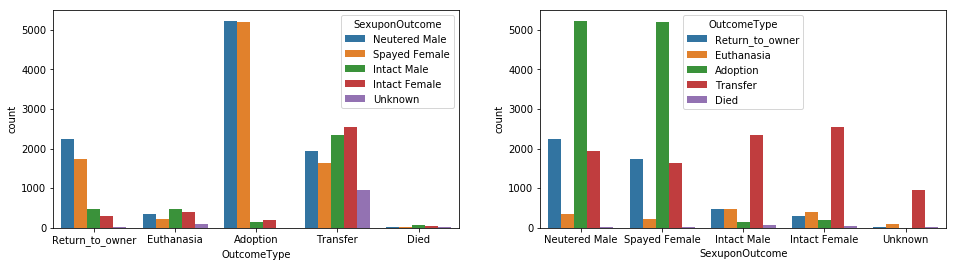

In [24]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType', hue='SexuponOutcome', ax=ax1)
sns.countplot(data=animals, x='SexuponOutcome',hue='OutcomeType', ax=ax2)

In [25]:
def get_sex(x):
    x = str(x)
    if 'Male' in x: return 'male'
    if 'Female' in x: return 'female'
    return 'unknown'

In [26]:
animals['Sex'] = animals.SexuponOutcome.apply(get_sex)

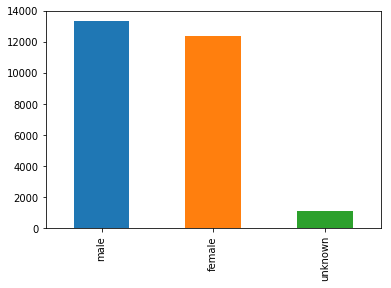

In [27]:
animals.Sex.value_counts().plot(kind='bar')

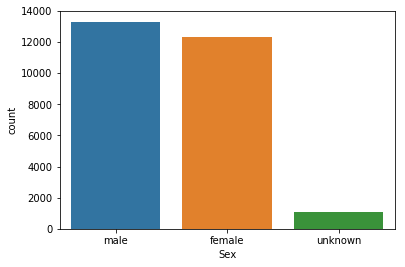

In [28]:
sns.countplot(x=animals.Sex)

In [29]:
def get_neutered(x):
    x = str(x)
    if 'Spayed' in x: return 'neutered'
    if 'Neutered' in x: return 'neutered'
    if 'Intact' in x: return 'intact'
    return 'unknown'

In [30]:
animals['Neutered'] = animals.SexuponOutcome.apply(get_neutered)

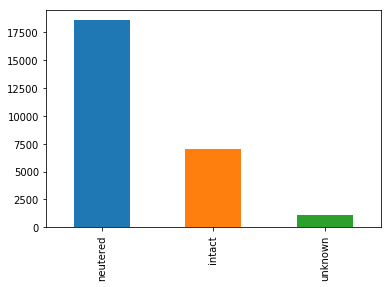

In [31]:
animals.Neutered.value_counts().plot(kind='bar')

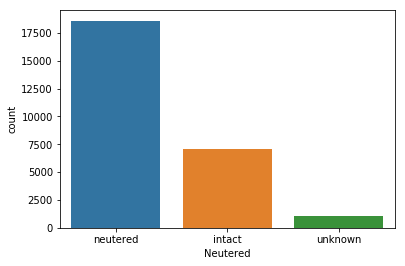

In [32]:
sns.countplot(x=animals.Neutered)

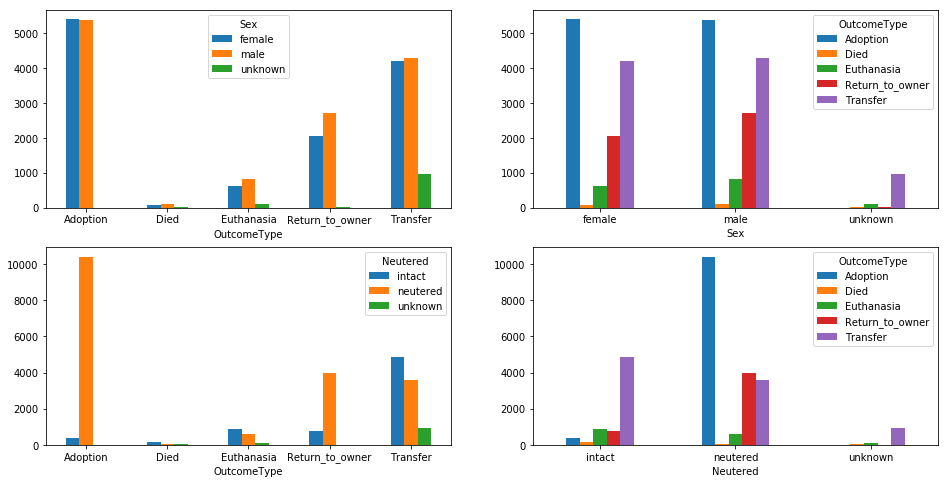

In [33]:
_, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8), )
animals[['Sex', 'OutcomeType']].groupby(['OutcomeType', 'Sex']).size().unstack().plot(kind='bar', ax=ax1[0], rot=0)
animals[['Sex', 'OutcomeType']].groupby(['Sex', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax1[1], rot=0)
animals[['Neutered', 'OutcomeType']].groupby(['OutcomeType', 'Neutered']).size().unstack().plot(kind='bar', ax=ax2[0], rot=0)
animals[['Neutered', 'OutcomeType']].groupby(['Neutered', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax2[1], rot=0)

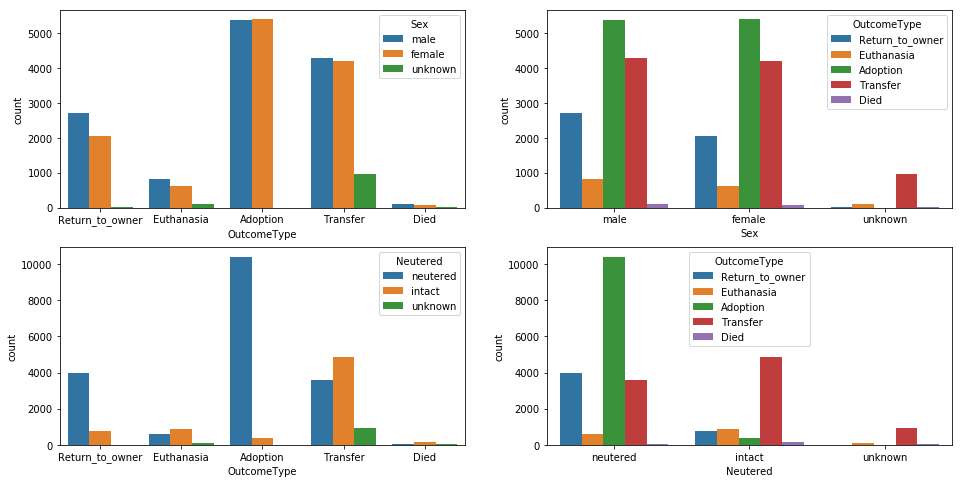

In [34]:
_, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8))
sns.countplot(data=animals, x='OutcomeType', hue='Sex', ax=ax1[0])
sns.countplot(data=animals, x='Sex', hue='OutcomeType', ax=ax1[1])
sns.countplot(data=animals, x='OutcomeType', hue='Neutered', ax=ax2[0])
sns.countplot(data=animals, x='Neutered', hue='OutcomeType', ax=ax2[1])

ช่วงเวลาก็อาจจะมีส่วนในการตัดสินใจ?

In [35]:
animals['Converted-DateTime'] = pd.to_datetime(animals["DateTime"]).dt.date

In [36]:
animals.head(1)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Sex,Neutered,Converted-DateTime
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,male,neutered,2014-02-12


In [37]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 14 columns):
AnimalID              26729 non-null object
Name                  19038 non-null object
DateTime              26729 non-null object
OutcomeType           26729 non-null object
OutcomeSubtype        13117 non-null object
AnimalType            26729 non-null object
SexuponOutcome        26728 non-null object
AgeuponOutcome        26711 non-null object
Breed                 26729 non-null object
Color                 26729 non-null object
AgeInDays             26729 non-null int64
Sex                   26729 non-null object
Neutered              26729 non-null object
Converted-DateTime    26729 non-null object
dtypes: int64(1), object(13)
memory usage: 2.9+ MB


In [38]:
monthGroup = animals["Converted-DateTime"].groupby(animals["OutcomeType"])

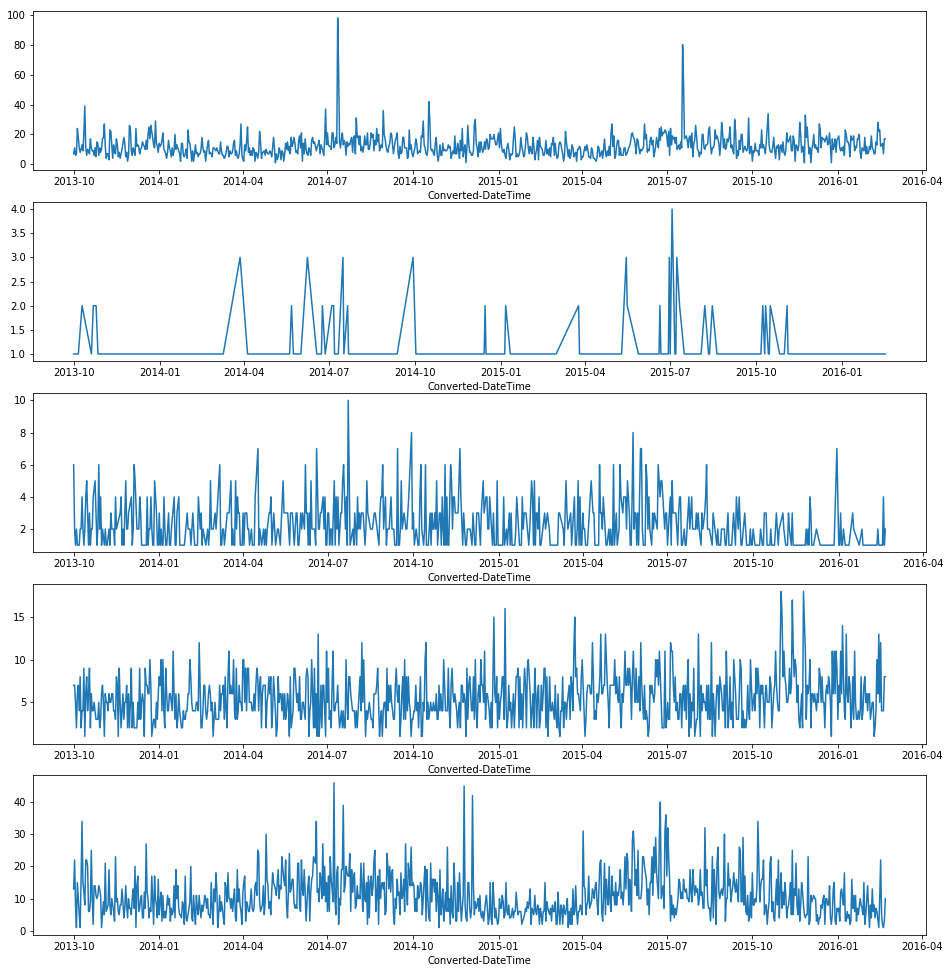

In [39]:
f, ax = plt.subplots(5, 1, figsize=(16, 17))

animals[animals.OutcomeType == 'Adoption'].groupby('Converted-DateTime')['Converted-DateTime'].count().plot(ax=ax[0])
animals[animals.OutcomeType == 'Died'].groupby('Converted-DateTime')['Converted-DateTime'].count().plot(ax=ax[1])
animals[animals.OutcomeType == 'Euthanasia'].groupby('Converted-DateTime')['Converted-DateTime'].count().plot(ax=ax[2])
animals[animals.OutcomeType == 'Return_to_owner'].groupby('Converted-DateTime')['Converted-DateTime'].count().plot(ax=ax[3])
animals[animals.OutcomeType == 'Transfer'].groupby('Converted-DateTime')['Converted-DateTime'].count().plot(ax=ax[4])

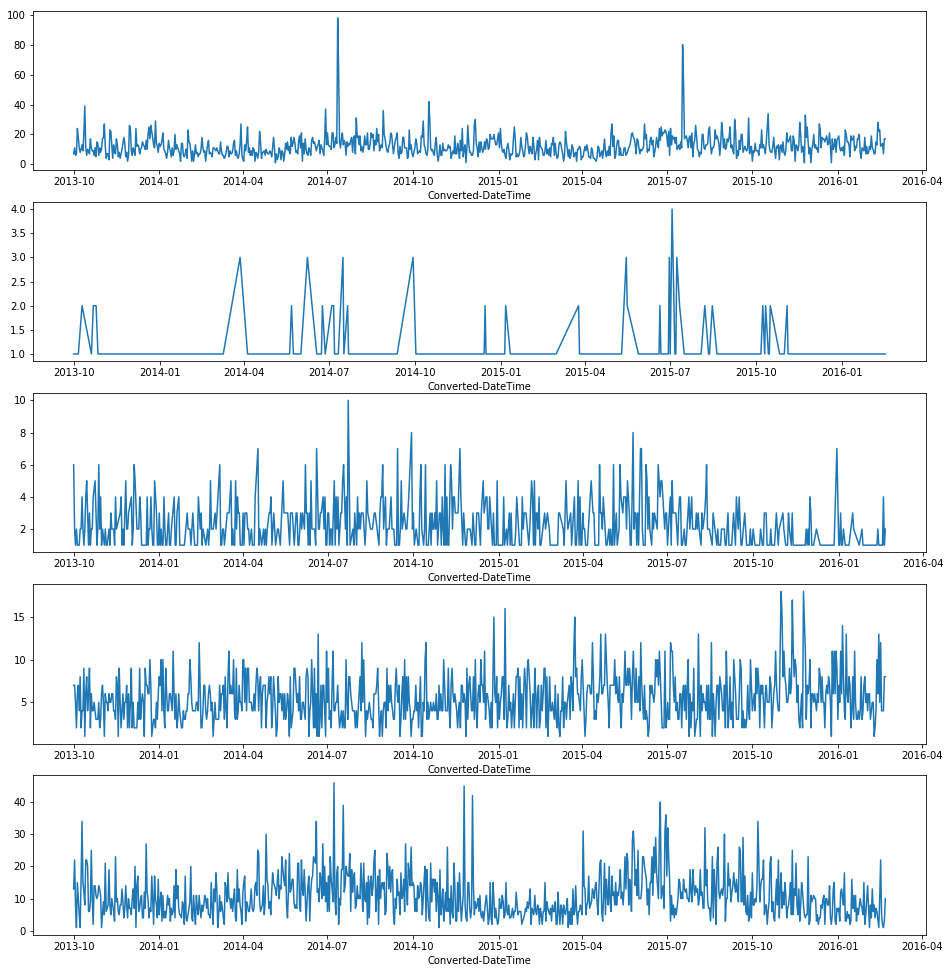

In [40]:
f, ax = plt.subplots(5, 1, figsize=(16, 17))

month_group = animals['Converted-DateTime'].groupby(animals['OutcomeType'])
for i, g in enumerate(month_group):
    g[1].groupby(animals['Converted-DateTime']).count().plot(ax=ax[i])

In [41]:
animals.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Sex,Neutered,Converted-DateTime
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,male,neutered,2014-02-12
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365,female,neutered,2013-10-13
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730,male,neutered,2015-01-31


In [42]:
X = animals.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'SexuponOutcome', 'AgeuponOutcome', 'Converted-DateTime'], axis=1)
y = animals['OutcomeType']

In [43]:
X.head()

,AnimalType,Breed,Color,AgeInDays,Sex,Neutered
0,Dog,Shetland Sheepdog Mix,Brown/White,365,male,neutered
1,Cat,Domestic Shorthair Mix,Cream Tabby,365,female,neutered
2,Dog,Pit Bull Mix,Blue/White,730,male,neutered
3,Cat,Domestic Shorthair Mix,Blue Cream,21,male,intact
4,Dog,Lhasa Apso/Miniature Poodle,Tan,730,male,neutered


In [44]:
y.head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

In [45]:
X.isnull().sum()

AnimalType    0
Breed         0
Color         0
AgeInDays     0
Sex           0
Neutered      0
dtype: int64

In [46]:
X.count()

AnimalType    26729
Breed         26729
Color         26729
AgeInDays     26729
Sex           26729
Neutered      26729
dtype: int64

In [47]:
y.count()

26729

In [48]:
animals_test = pd.read_csv("data/shelter-test.csv")

In [49]:
from sklearn import preprocessing

le_animal_type = preprocessing.LabelEncoder()
le_animal_type.fit(X.AnimalType)
X.AnimalType = le_animal_type.transform(X.AnimalType)

In [50]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X.Sex)
X.Sex = le_sex.transform(X.Sex)

le_neutered = preprocessing.LabelEncoder()
le_neutered.fit(X.Neutered)
X.Neutered = le_neutered.transform(X.Neutered)

le_breed = preprocessing.LabelEncoder()
le_breed.fit(X.Breed.append(animals_test.Breed))
X.Breed = le_breed.transform(X.Breed)

le_color = preprocessing.LabelEncoder()
le_color.fit(X.Color.append(animals_test.Color))
X.Color = le_color.transform(X.Color)

le_out = preprocessing.LabelEncoder()
le_out.fit(y)
y = le_out.transform(y)

In [51]:
X.head()

,AnimalType,Breed,Color,AgeInDays,Sex,Neutered
0,1,1482,146,365,1,1
1,0,775,184,365,0,1
2,1,1293,97,730,1,1
3,0,775,47,21,1,0
4,1,1101,311,730,1,1


In [52]:
y

array([3, 2, 0, ..., 0, 4, 4])

In [53]:
le_out.inverse_transform(y)

/Users/zkan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Return_to_owner', 'Euthanasia', 'Adoption', ..., 'Adoption',
       'Transfer', 'Transfer'], dtype=object)

In [54]:
from sklearn import model_selection, neighbors

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn = neighbors.KNeighborsClassifier()
grid = model_selection.GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid.fit(X, y)

grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]

In [55]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5483183059598189
{'n_neighbors': 21}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')


**Warning:** Cross validation for Randorm Forest classifier takes time.

In [56]:
from sklearn import model_selection, ensemble

n_range = [1000, 1500]
param_grid = dict(n_estimators=n_range)

rf = ensemble.RandomForestClassifier()
grid = model_selection.GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid.fit(X, y)

grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]

Text(0,0.5,'Cross-Validated Accuracy')

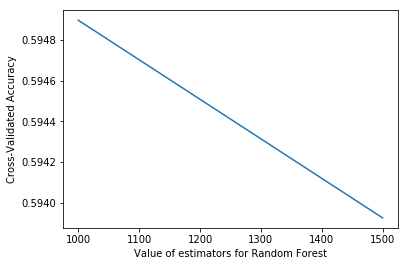

In [57]:
plt.plot(n_range, grid_mean_scores)
plt.xlabel('Value of estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')

In [58]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5948969284297954
{'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## ลองใช้โมเดลกับชุดข้อมูลทดสอบ

In [59]:
animals_test = pd.read_csv('data/shelter-test.csv')
animals_test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [60]:
animals_test['AgeInDays'] = animals_test.AgeuponOutcome.map(get_age_in_days)
animals_test['Sex'] = animals_test.SexuponOutcome.apply(get_sex)
animals_test['Neutered'] = animals_test.SexuponOutcome.apply(get_neutered)

In [61]:
animals_test.head(3)

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Sex,Neutered
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,300,female,intact
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,730,female,neutered
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,365,male,neutered


In [62]:
X_test = animals_test.drop(['ID', 'Name', 'DateTime', 'SexuponOutcome', 'AgeuponOutcome'], axis=1)

In [63]:
X_test.AnimalType = le_animal_type.transform(X_test.AnimalType)
X_test.Sex = le_sex.transform(X_test.Sex)
X_test.Neutered = le_neutered.transform(X_test.Neutered)
X_test.Breed = le_breed.transform(X_test.Breed)
X_test.Color = le_color.transform(X_test.Color)

In [64]:
X_test.head()

,AnimalType,Breed,Color,AgeInDays,Sex,Neutered
0,1,1023,283,300,0,0
1,1,875,40,730,0,1
2,0,775,117,365,1,1
3,1,658,346,120,1,0
4,1,1165,359,730,1,1


In [65]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X, y)
y_pred_class = rf.predict(X_test)

In [66]:
rf.feature_importances_

array([0.02851124, 0.25684418, 0.24960134, 0.25714348, 0.03625474,
       0.17164502])

In [67]:
y_pred_class

array([4, 3, 4, ..., 4, 0, 2])

In [68]:
y_pred_class = le_out.inverse_transform(y_pred_class)
y_pred_class

/Users/zkan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Transfer', 'Return_to_owner', 'Transfer', ..., 'Transfer',
       'Adoption', 'Euthanasia'], dtype=object)

สร้างไฟล์ submission เตรียมส่ง Kaggle

In [69]:
import csv

def create_submission(y_pred_class):
    f = open('tmp/submission.csv', 'w')
    filewrite = csv.writer(f)
    filewrite.writerow(["ID", "Adoption", "Died", "Euthanasia", "Return_to_owner", "Transfer"])
    for index, each in enumerate(y_pred_class):
        result = [str(index + 1)]
        if each == 'Adoption':
            result.append(1)
        else:
            result.append(0)
        if each == 'Died':
            result.append(1)
        else:
            result.append(0)
        if each == 'Euthanasia':
            result.append(1)
        else:
            result.append(0)
        if each == 'Return_to_owner':
            result.append(1)
        else:
            result.append(0)
        if each == 'Transfer':
            result.append(1)
        else:
            result.append(0)
            
        filewrite.writerow(result)
        
    f.close()

In [70]:
create_submission(y_pred_class)